# Shopper Spectrum

## Data Collection

In [5]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [6]:
data = pd.read_csv("online_retail.csv")

In [7]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France


## Data understanding

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [13]:
data.describe() # missing values found in Customer ID column and Description column

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Data Preprocessing

In [15]:
missing_count = data["CustomerID"].isna().sum()

print("Missing Customer ID count:", missing_count)

Missing Customer ID count: 135080


In [27]:
# Remove Blank CustomerID data
data = data[
    data["CustomerID"].notna() & 
    (data["CustomerID"].astype(str).str.strip() != '')
].copy()


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [29]:
# Removes InvoiceNo starts with 'C'

data = data[~data["InvoiceNo"].astype(str).str.startswith('C')] # ~ Logical NOT operator in pandas. Gives True only for rows not starting with 'C'


In [33]:
# Remove negative or zero quantities and prices

data = data[(data["Quantity"] > 0) & (data["UnitPrice"] > 0)]


In [39]:
# Convert data types

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['CustomerID'] = data['CustomerID'].astype(str)


In [43]:
# Final Data shape

print("Final shape:", data.shape)
data.head()


Final shape: (397884, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


# Exploratory Data Analysis (EDA)

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
country_orders = data['Country'].value_counts().sort_values(ascending=False)

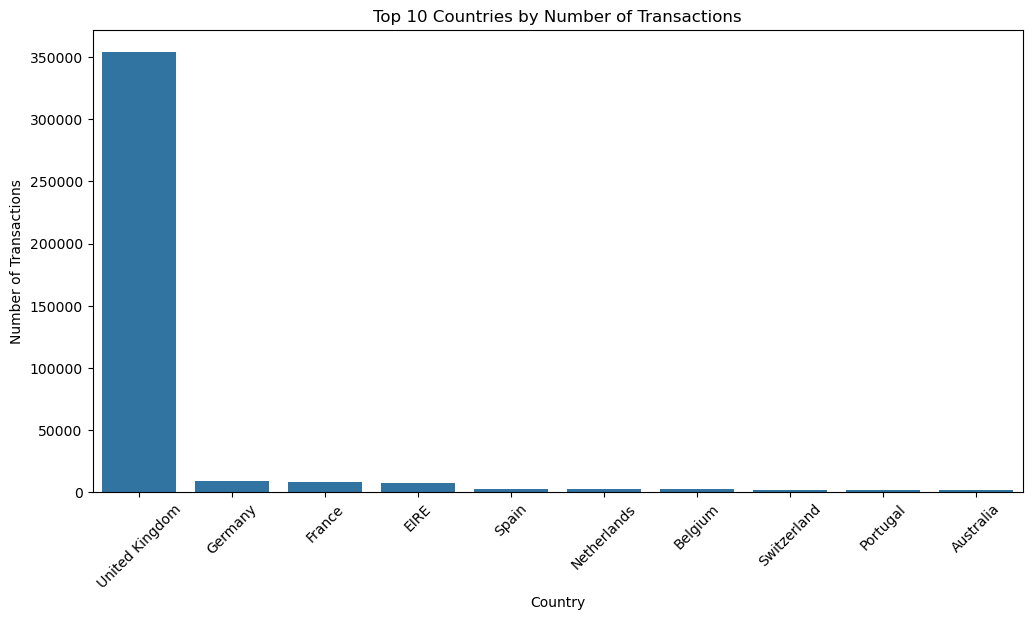

In [58]:
# 1. Transaction volume by country

plt.figure(figsize=(12,6))
sns.barplot(x=country_orders.head(10).index, y=country_orders.head(10).values)
plt.title("Top 10 Countries by Number of Transactions")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

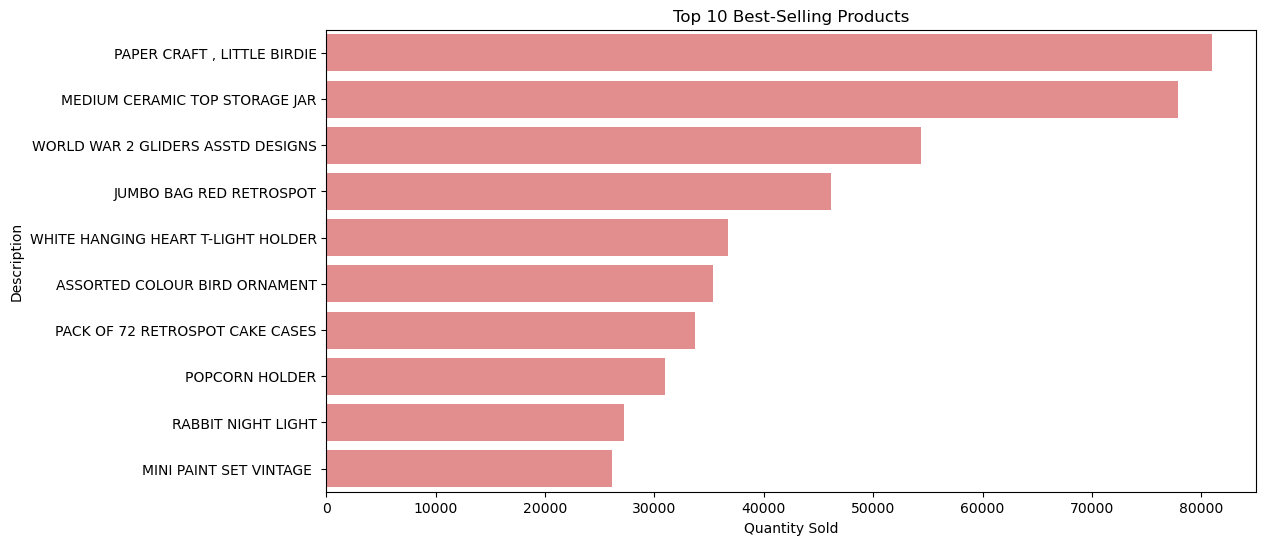

In [60]:
# 2. Top-Selling Products

top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, color='lightcoral')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Quantity Sold")
plt.show()


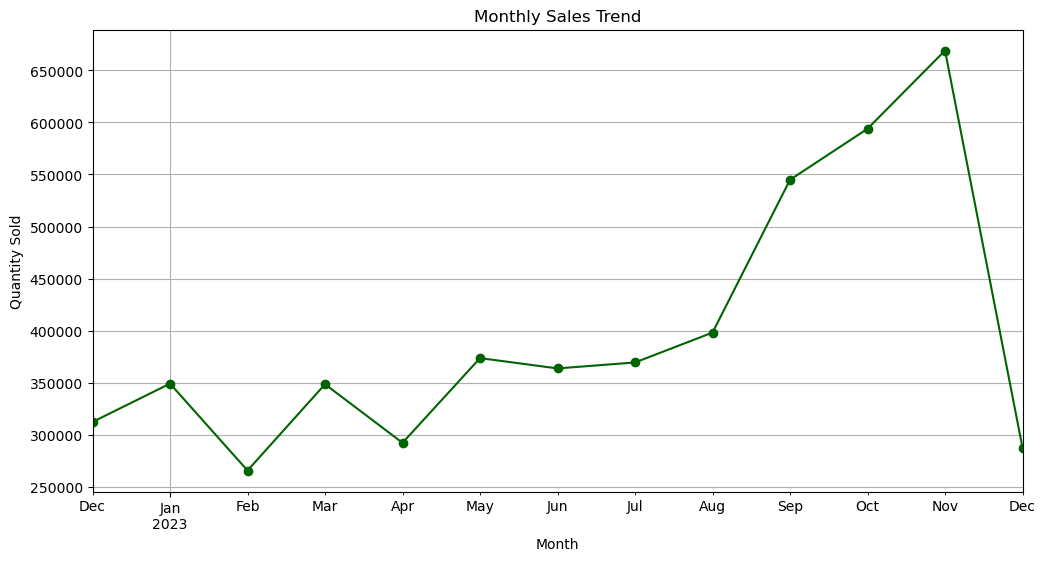

In [64]:
# 3. Purchase Trends Over time

data['InvoiceMonth'] = data['InvoiceDate'].dt.to_period('M')
monthly_sales = data.groupby('InvoiceMonth')['Quantity'].sum()

monthly_sales.plot(kind='line', figsize=(12,6), marker='o', color='darkgreen')
plt.title("Monthly Sales Trend")
plt.ylabel("Quantity Sold")
plt.xlabel("Month")
plt.grid(True)
plt.show()



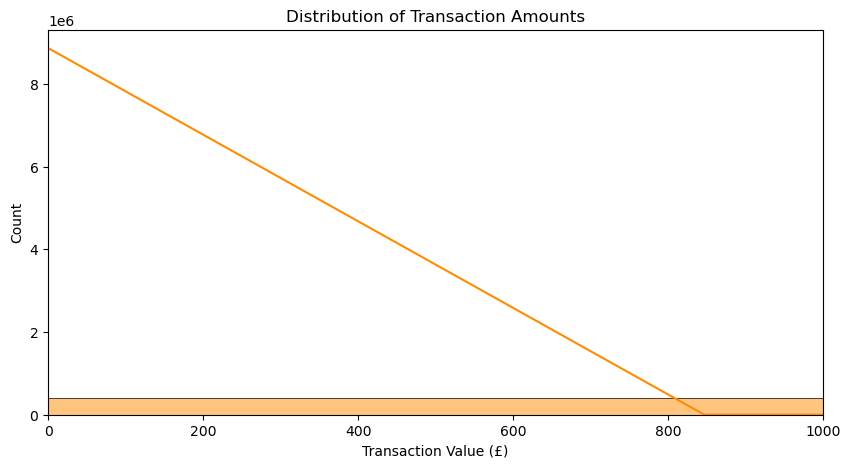

In [70]:
# 4. Distribution of Monetary Value per Transaction

data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

plt.figure(figsize=(10,5))
sns.histplot(data['TotalAmount'], bins=100, kde=True, color='darkorange')
plt.xlim(0, 1000)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Value (£)")
plt.show()


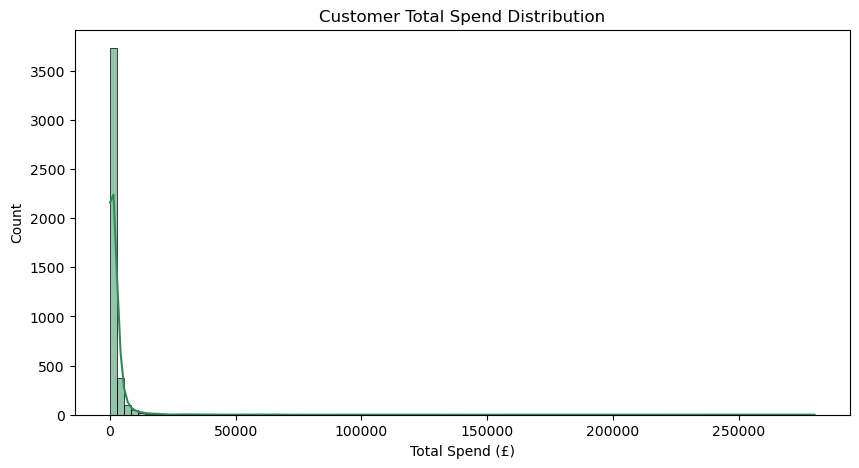

In [78]:
# 5.  Total Spend per Customer

customer_spend = data.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.histplot(customer_spend, bins=100, kde=True,  color='seagreen')
plt.title("Customer Total Spend Distribution")
plt.xlabel("Total Spend (£)")
plt.show()


# RFM Feature Engineering

In [81]:
import datetime as dt

# snapshot date: one day after the last purchase
snapshot_date = data['InvoiceDate'].max() + dt.timedelta(days=1)
print("Snapshot Date:", snapshot_date)


Snapshot Date: 2023-12-10 12:50:00


In [87]:
# Calculate RFM Table

rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalAmount': 'sum'                                       # Monetary
})

rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalAmount': 'Monetary'
}, inplace=True)

rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


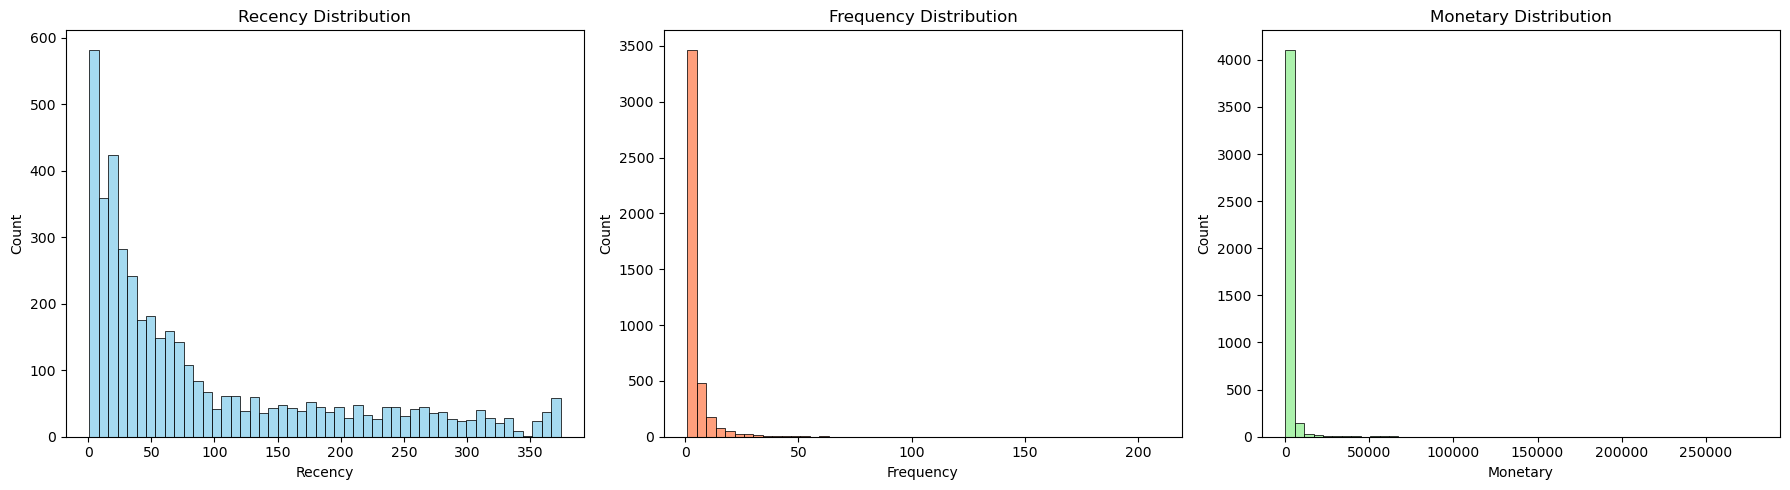

In [89]:
# Visualize RFM Distribution

plt.figure(figsize=(18,5))

# Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=50, color='skyblue')
plt.title("Recency Distribution")

# Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=50, color='coral')
plt.title("Frequency Distribution")

# Monetary
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=50, color='lightgreen')
plt.title("Monetary Distribution")

plt.tight_layout()
plt.show()


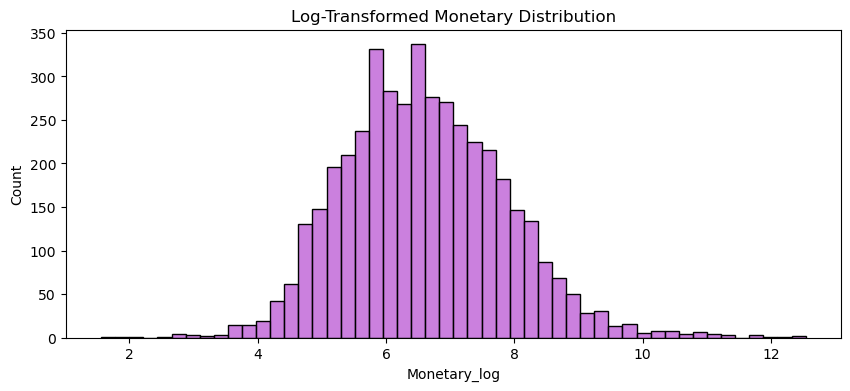

In [95]:
#  Log Transformation (for skewed features)

rfm['Monetary_log'] = np.log1p(rfm['Monetary'])
rfm['Frequency_log'] = np.log1p(rfm['Frequency'])

# Visualize log-transformed distributions
plt.figure(figsize=(10,4))
sns.histplot(rfm['Monetary_log'], bins=50, color='mediumorchid')
plt.title("Log-Transformed Monetary Distribution")
plt.show()



In [97]:
# RFM Scoring

# Recency Score (lower recency is better)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]) # qcut - quantile-based discretization [used to split a numeric column into equal-sized percentiles]

# Frequency Score (higher is better)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])

# Monetary Score (higher is better)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])


In [99]:
# Overall RFM Segment

rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score','F_Score','M_Score']].astype(int).sum(axis=1)


In [105]:
rfm[['RFM_Segment', 'RFM_Score']].head()

# 555 - Most valuable
# 112 - Least active and less spending

,RFM_Segment,RFM_Score
CustomerID,,
12346.0,115,7
12347.0,555,15
12348.0,244,10
12349.0,414,9
12350.0,112,4


# Customer Segmentation 

In [212]:
# Scale RFM Values

from sklearn.preprocessing import StandardScaler

rfm_for_clustering = rfm[['Recency', 'Frequency', 'Monetary']]

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_for_clustering)


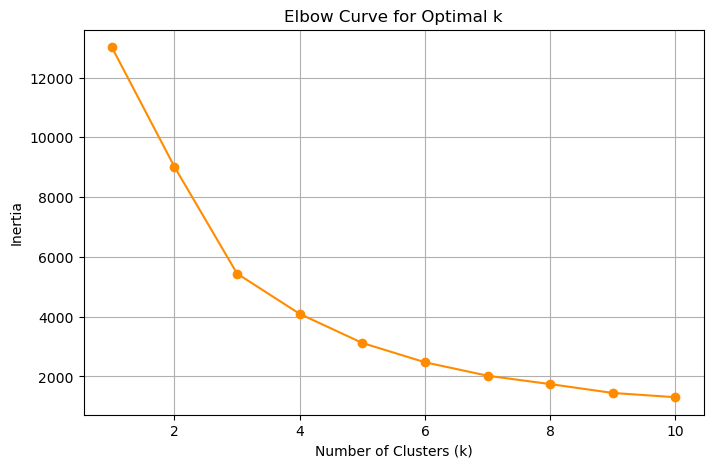

In [214]:
# Elbow method - Find optimal cluster

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o', color='darkorange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Optimal k')
plt.grid(True)
plt.show()


In [240]:
# Apply K means with optimal (k - 4)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)



In [246]:
# Analyze and label clusters

cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)
cluster_summary


,Recency,Frequency,Monetary
Cluster,,,
0,43.7,3.7,1359.0
1,248.1,1.6,480.6
2,7.4,82.5,127338.3
3,15.5,22.3,12709.1


In [234]:
cluster_labels = {
    0: 'Occasional',
    1: 'At-Risk',
    2: 'High-Value',
    3: 'Regular'
}

rfm['Segment'] = rfm['Cluster'].map(cluster_labels)


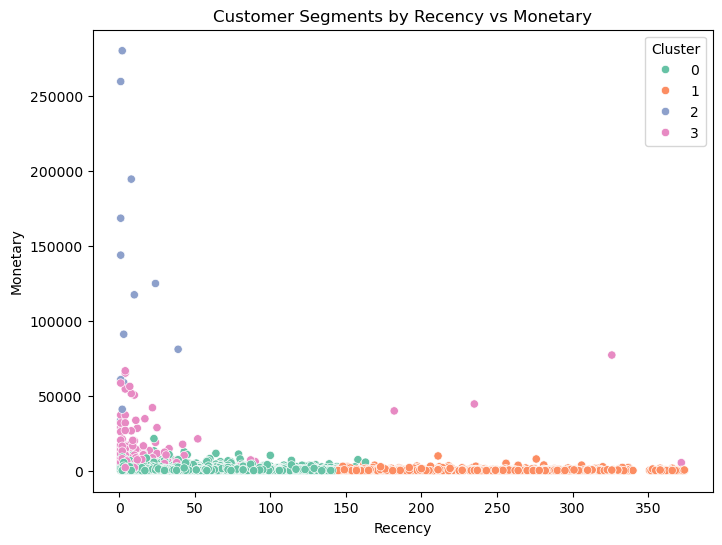

In [228]:
# Visualize clusters

plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set2')
plt.title("Customer Segments by Recency vs Monetary")
plt.show()


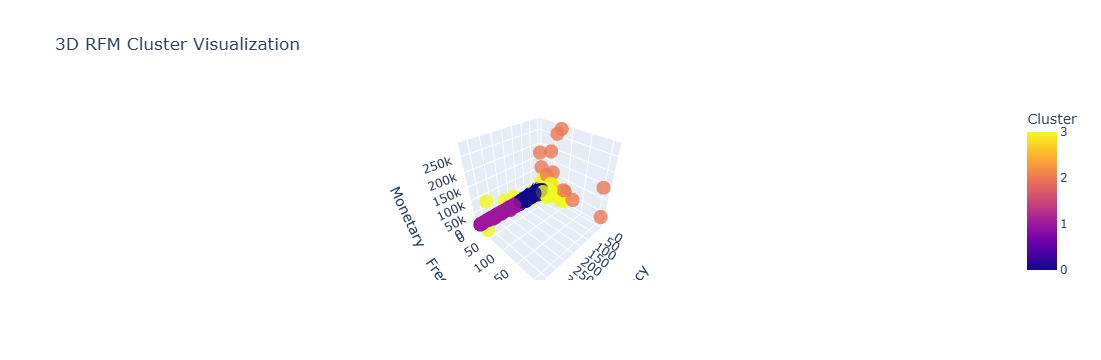

In [128]:

fig = px.scatter_3d(
    rfm,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color='Cluster',  # or use 'Segment' if you've labeled clusters
    title='3D RFM Cluster Visualization',
    opacity=0.8,
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.show()


# silhouette_score method

In [ ]:
# Measures how well each point fits into its assigned cluster.
# Ranges from -1 to 1:
# +1 = very well clustered
# 0 = borderline
# -1 = misclassified
# A higher average score means better-defined clusters.

In [132]:
from sklearn.metrics import silhouette_score


In [135]:
silhouette_scores = []
K = range(2, 11)  # Silhouette Score is invalid for k=1

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    y_kmeans = kmeans.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, y_kmeans)
    silhouette_scores.append(score)


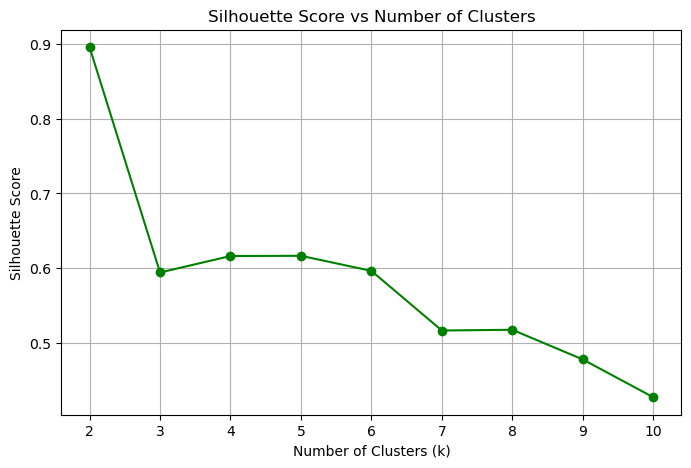

In [137]:
# Plot scores

plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


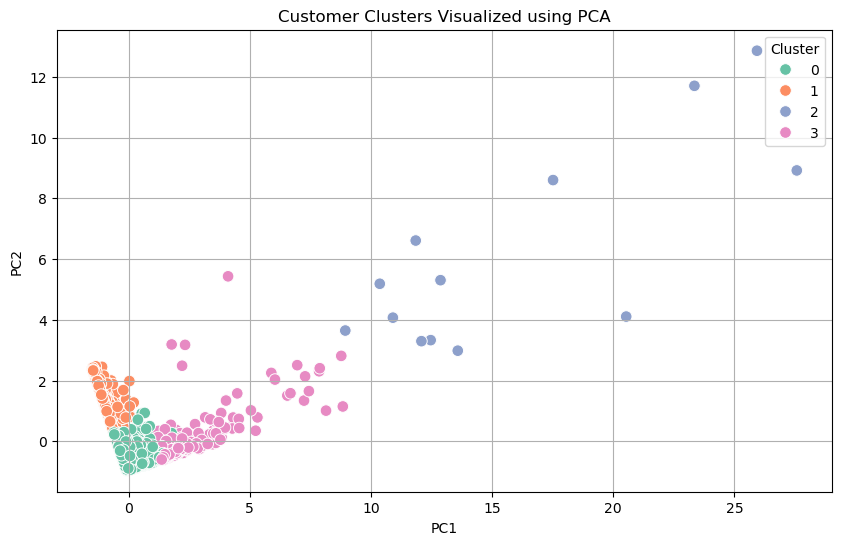

In [200]:
# Visualize KMeans Clusters using PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

# Combine into a plotting DataFrame
rfm_pca_df = pd.DataFrame(rfm_pca, columns=['PC1', 'PC2'])
rfm_pca_df['Cluster'] = rfm['Cluster'].values  # important

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=70)
plt.title("Customer Clusters Visualized using PCA")
plt.grid(True)
plt.show()


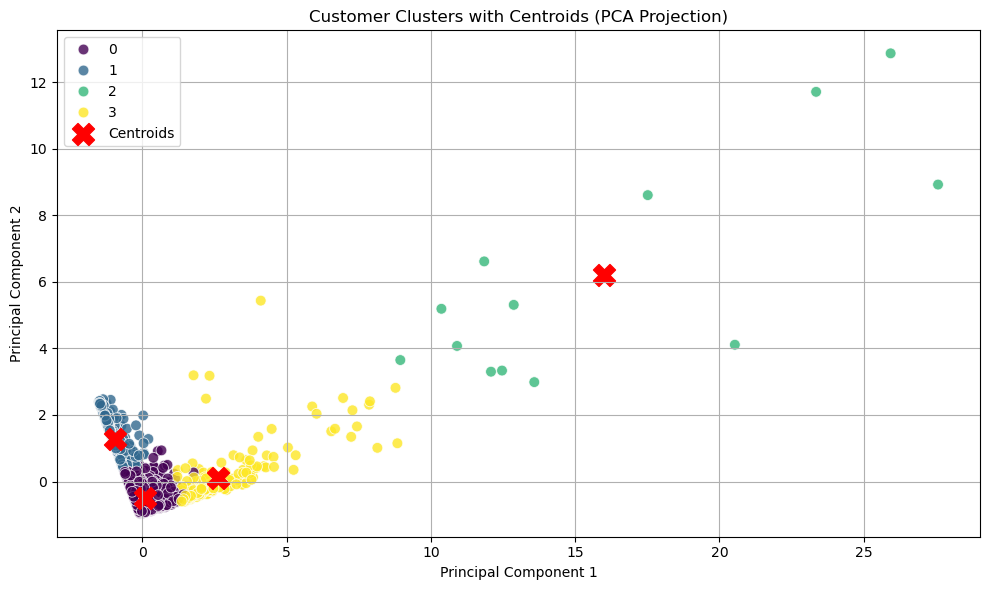

In [196]:
# Plot cluster centroids

# Apply PCA to RFM-scaled data and centroids
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Create a DataFrame for plotting
rfm_pca_df = pd.DataFrame(rfm_pca, columns=['PC1', 'PC2'])
rfm_pca_df['Cluster'] = rfm['Cluster'].values

# Plot clusters + centroids
plt.figure(figsize=(10, 6))

# Plot the clusters
sns.scatterplot(
    data=rfm_pca_df,
    x='PC1', y='PC2',
    hue='Cluster',
    palette='viridis',
    s=60,
    alpha=0.8
)

# Plot the centroids
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    c='red',
    s=250,
    marker='X',
    label='Centroids'
)

plt.title("Customer Clusters with Centroids (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Product recommendation system [item-based collaborative filtering]

In [140]:
# Create customer product matrix

product_matrix = data.pivot_table(
    index='CustomerID',
    columns='Description',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)


In [142]:
product_matrix

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
# Compute Cosine Similarity Between Products

from sklearn.metrics.pairwise import cosine_similarity

# Transpose so products are rows
product_similarity = cosine_similarity(product_matrix.T)

# Convert to DataFrame for easy lookup
similarity_df = pd.DataFrame(
    product_similarity,
    index=product_matrix.columns,
    columns=product_matrix.columns
)


In [150]:
similarity_df

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Description,,,,,,,,,,,,,,,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,1.000000,0.000000,0.000021,0.000227,0.000000,0.000000,0.020155,0.000000,0.000262,0.063396,...,0.000000,0.001368,0.015886,0.001767,0.000000,0.002846,0.000000,0.013128,0.000000,0.002594
50'S CHRISTMAS GIFT BAG LARGE,0.000000,1.000000,0.003533,0.004001,0.000000,0.020034,0.027433,0.900849,0.119031,0.013380,...,0.000000,0.001718,0.015572,0.018032,0.000000,0.015710,0.000000,0.011238,0.000000,0.029793
DOLLY GIRL BEAKER,0.000021,0.003533,1.000000,0.870851,0.980561,0.006296,0.005302,0.003034,0.001765,0.411331,...,0.000000,0.000043,0.002869,0.344923,0.000000,0.525860,0.000000,0.822946,0.000097,0.006665
I LOVE LONDON MINI BACKPACK,0.000227,0.004001,0.870851,1.000000,0.883883,0.019879,0.004904,0.004043,0.008270,0.382056,...,0.000000,0.001409,0.004197,0.310017,0.000000,0.471717,0.000000,0.749210,0.000000,0.010393
I LOVE LONDON MINI RUCKSACK,0.000000,0.000000,0.980561,0.883883,1.000000,0.000000,0.000000,0.000000,0.000000,0.410578,...,0.000000,0.000000,0.000000,0.347021,0.000000,0.530836,0.000000,0.837170,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZINC T-LIGHT HOLDER STARS SMALL,0.002846,0.015710,0.525860,0.471717,0.530836,0.016877,0.129563,0.015265,0.001125,0.231796,...,0.014745,0.009731,0.108995,0.585205,0.020853,1.000000,0.006385,0.483930,0.002333,0.133134
ZINC TOP 2 DOOR WOODEN SHELF,0.000000,0.000000,0.000000,0.000000,0.000000,0.023187,0.056523,0.000000,0.000367,0.000000,...,0.000000,0.000000,0.013708,0.025044,0.000000,0.006385,1.000000,0.013216,0.000000,0.000000
ZINC WILLIE WINKIE CANDLE STICK,0.013128,0.011238,0.822946,0.749210,0.837170,0.016811,0.022624,0.012923,0.000599,0.373859,...,0.000000,0.022943,0.028676,0.324528,0.000000,0.483930,0.013216,1.000000,0.006986,0.024610


In [152]:
# Define Function to Recommend Top 5 Similar Products

def recommend_products(product_name, similarity_df, top_n=5):
    if product_name not in similarity_df.columns:
        return f"Product '{product_name}' not found in dataset."

    # Get similarity scores, sort them (excluding self)
    similar_scores = similarity_df[product_name].sort_values(ascending=False)
    top_similar = similar_scores.iloc[1:top_n+1]  # skip first (self)
    
    return top_similar


In [154]:
recommend_products("WHITE HANGING HEART T-LIGHT HOLDER", similarity_df)


Description
GIN + TONIC DIET METAL SIGN         0.750410
RED HANGING HEART T-LIGHT HOLDER    0.658719
WASHROOM METAL SIGN                 0.643500
LAUNDRY 15C METAL SIGN              0.642206
GREEN VINTAGE SPOT BEAKER           0.631461
Name: WHITE HANGING HEART T-LIGHT HOLDER, dtype: float64

In [156]:
# Product similarity Heatmap

top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).index


In [158]:
similarity_subset = similarity_df.loc[top_products, top_products]


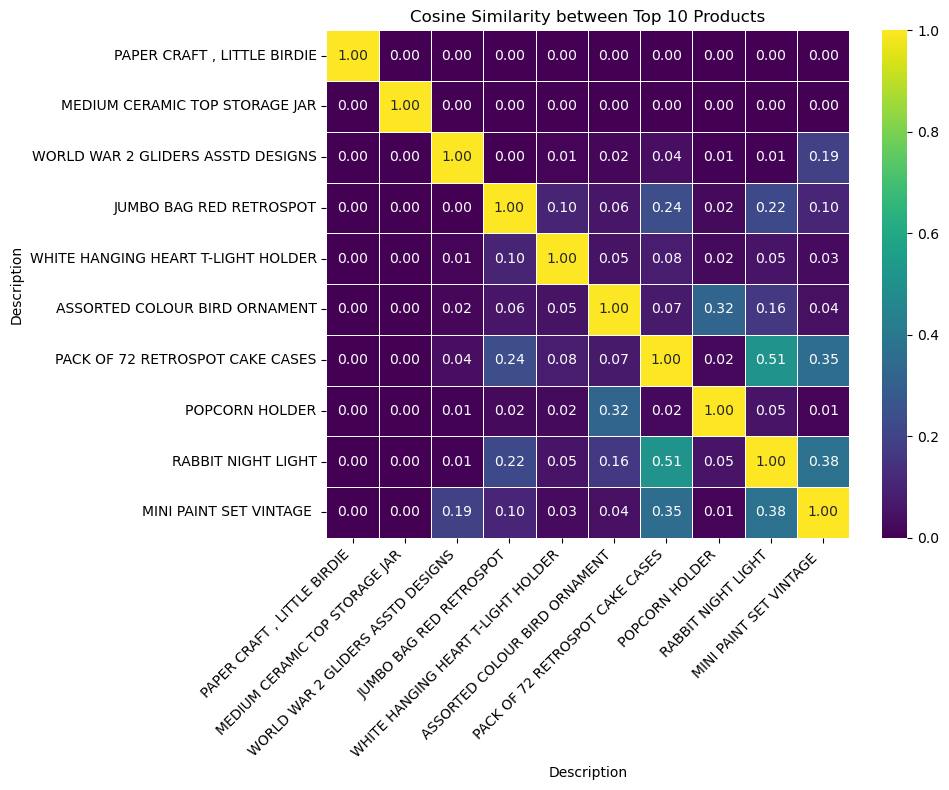

In [162]:

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_subset, annot=True, cmap='viridis', linewidths=0.5, fmt=".2f")
plt.title("Cosine Similarity between Top 10 Products")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [242]:
# Save model

import pickle

# Save KMeans model
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

# Save Scaler used for RFM
with open("rfm_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)



In [244]:

# Save product similarity matrix
similarity_df.to_pickle("product_similarity.pkl")